In [1]:
#A continuación importamos las librerias que utilizaremos. 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
import scipy.integrate
from tqdm import tqdm

# Taller 4: Métodos Computacionales
### Estudiantes: Andrés Hernández (201329363)    Francisco Díaz (201912252)

## 1. Derivada espectral
**2.** Utilizando la propiedad de la transformada de Fourier $\mathcal{F} \left ( \frac{df(x)}{dx} \right ) = i \omega \mathcal{F}(f(x)) $ calcular la dereviada de la función:
$$
f(t)= e^{-t^{2}/25} \cos t
$$
en el intervalo $(-10 \leq t \leq 10)$. Compares su resultado con la definición de la derivada dado por el método de diferencias finitas. Utilice $h= L/N = 0.4$ con $N= 50, L= 20$ y $\omega_{0} = 2\pi /L$.

In [2]:
# Definimos las funciones que utilizaremos para la implementación de la derivada

def f(t):
    return np.exp(-(t**2)/25)*np.cos(t)

def DerivadaExacta(t):
    return -np.exp(-(t**2)/25)*((2*t*np.cos(t)/25) + np.sin(t))

def DerivadaCentral(f, t, h):
    d=0.
    if(h!=0):
        d= (f(t+h)-f(t-h))/(2*h)
    return d

def DerivadaEspectral(f, t, L, N):
    w0 =  2*np.pi/L 
    FFT = np.fft.fft(f(t))
    k = w0*np.arange(-N/2,N/2)
    k= np.fft.fftshift(k) 
    dFFT = k*FFT*(1j)
    return np.real(np.fft.ifft(dFFT))

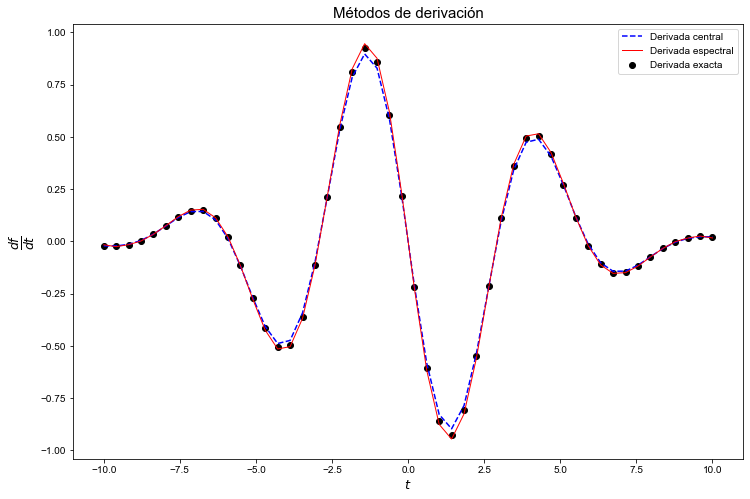

In [3]:
# Calculamos y graficamos los métodos implementados

N, L = 50., 20.
h = L/N

t = np.linspace(-L/2, L/2, int(N))

dExact = DerivadaExacta(t)
dCentral = DerivadaCentral(f, t, h)
dSpectral = DerivadaEspectral(f, t, L, N)

fig = plt.figure(figsize =  (12, 8))
plt.plot(t, dCentral , '--', color='b', linewidth=1.5, label='Derivada central')
plt.plot(t, dSpectral, color='r', linewidth=1, label='Derivada espectral')
plt.scatter(t, dExact, color='k',  label='Derivada exacta')
plt.xlabel('$t$', fontsize = 13)
plt.ylabel(r'$\frac{df}{dt}$', fontsize = 18)
plt.title("Métodos de derivación", fontsize = 15)
plt.legend()
plt.style.use('seaborn-whitegrid')
plt.show()

**3.** Dada la secuencia $x[n] = \delta[n] + \delta[n-1]+ \delta[n-2]+ \delta[n-2]$ y la respuesta al impulso $h[n] = \delta[n] + \delta[n-1]$ calcule la convolución $y[n]$ de tamaño 4 de ambas secuencias.

In [4]:
# Definimos las funciones, en particular la de convulicón discreta

def deltaStep(n):
    if n== 0:
        return 1
    else:
        return 0  
def x(n):
    return deltaStep(n) +deltaStep(n-1) + deltaStep(n-2)+ deltaStep(n-2)

def h(n):
    return deltaStep(n)+deltaStep(n-1)

def y(f, g, n):
    y = 0
    for m in range(-N, N+1):
        y += f(m)*g(n-m)
    return y

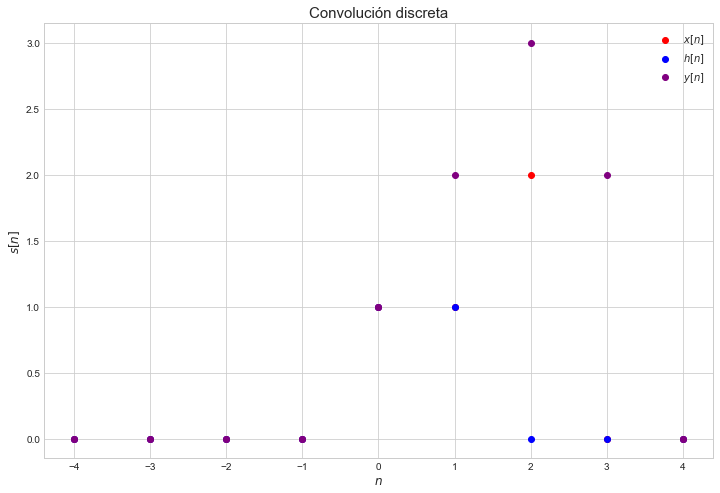

In [5]:
X, H, Y = [], [], []
N = 4
for i in range(-N, N+1):
    X.append(x(i))
    H.append(h(i))
    Y.append(y(x, h, i))
Test = np.arange(-N,N+1)
fig = plt.figure(figsize =  (12, 8))
plt.scatter(Test, X, color='r',  label='$x[n]$')
plt.scatter(Test, H, color='b',  label='$h[n]$')
plt.scatter(Test, Y, color='purple',  label='$y[n]$')
plt.ylabel(r'$s[n]$', fontsize = 12)
plt.xlabel(r'$n$', fontsize = 12)
plt.title("Convolución discreta", fontsize = 15)
plt.legend()
plt.style.use('seaborn-whitegrid')
plt.show()

## 2. Ecuación diferencial no lineal 

**2.** Considere la ecuación diferencial no lineal:
$$
\frac{du}{dt} = u^q  
$$
Encontrar la solución numéricamente para algunos valores de $q> 1$.

In [6]:
# Primero definimos las funciones pertinentes e implementamos el método de Runge-Kutta 2

def f(u, t, q):
    return u**(q)

def uExact(t, q):
    if q==1:
        return np.exp(t)
    else:
        return (t*(1-q) + 1)**(1/(1-q))

def GetEulerMejorado(t, deltat, q):
    u = np.zeros(Npoints)
    u[0] = uExact(0,q)
    for i in range(1, Npoints):
        k1 = f(u[i-1], t[i-1], q)
        k2 = f(u[i-1] + deltat*k1, t[i-1]+deltat, q)
        u[i] = u[i-1] +0.5*deltat*(k1+k2)  
    return u

# Calculamos soluciones numéricas para algunos valores de q

Q = 6
U = []
UExact = []
T = []
for i in range(1,Q):
    Tmin, Tmax, Npoints = 0., (1/((i+1)-1) ) , 100
    t= np.linspace(Tmin, Tmax, Npoints, endpoint = False)
    deltat = (Tmax-Tmin)/float(Npoints-1)
    
    U.append(GetEulerMejorado(t, deltat, i+1))
    UExact.append(uExact(t,i+1))
    T.append(t)

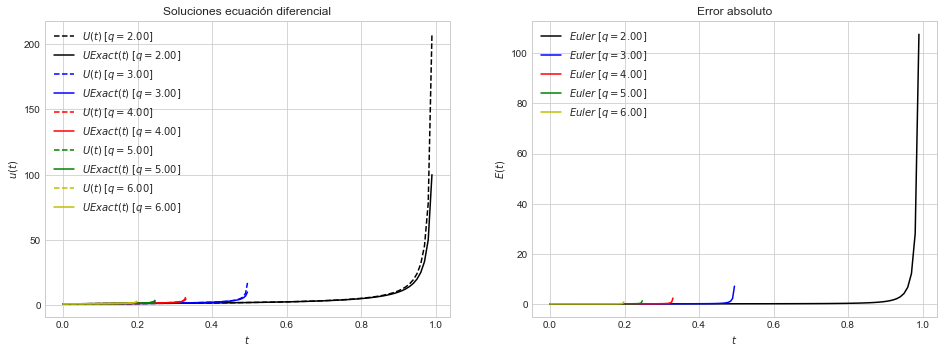

In [7]:
# Graficamos nuestras soluciones

fig = plt.figure(figsize =  (16, 12))
C = ['k','b','r','g','y']

ax1= fig.add_subplot(2,2,1)
for i in range(Q-1):
    ax1.plot(T[i], U[i], color=C[i], ls = '--',  label='$U(t) \; [q = {:.2f}]$'.format(i+2))
    ax1.plot(T[i], UExact[i], color= C[i],  label='$UExact(t) \; [q = {:.2f}]$'.format(i+2))
ax1.set_ylabel(r'$u(t)$', fontsize = 10)
ax1.set_xlabel(r'$t$', fontsize = 10)
ax1.set_title("Soluciones ecuación diferencial", fontsize = 12)
ax1.legend( loc = 'best')

ax2= fig.add_subplot(2,2,2)
for i in range(Q-1):
    ax2.plot(T[i], np.abs(UExact[i]-U[i]), color= C[i],  label='$Euler \; [q = {:.2f}]$'.format(i+2))
ax2.set_ylabel(r'$E(t)$', fontsize = 10)
ax2.set_xlabel(r'$t$', fontsize = 10)
ax2.set_title("Error absoluto", fontsize = 12)
ax2.legend( loc = 'best')

plt.style.use('seaborn-whitegrid')
plt.show()

**3.** Encontrar numéricamente la solución a la ecuación diferencial de Ricatti:
$$
x^3 y' = x^4 y^2 -2x^2 y -1
$$
utilizando la condición inicial $y(\sqrt{2})$.

La solución análitica de esta ecuación está dada por:
$$
y(x) = \frac{1}{x^2}   +\frac{2}{2c -x^2}
$$
En particular, para satisfacer nuestra condición inicial encontramos que $c= -1$. Así:
$$
y(x) = \frac{1}{x^2}   -\frac{2}{x^2 + 2}
$$

In [8]:
# Primero definimos las funciones pertinentes e implementamos el método de Runge-Kutta 4

def f(y, x):
    return x*(y**2) -2*(y/x) -(1/x**3)

def ExactSol(x):
    return 1/(x**2)  - (2/(x**2 + 2))

def GetRunge4(y,t,deltat, Npoints):

    for i in range(1,Npoints): 
        k1 = f(y[i-1], t[i-1])
        k2 = f(y[i-1] + 0.5*k1*deltat, t[i-1]+0.5*deltat)
        k3 = f(y[i-1] + 0.5*k2*deltat, t[i-1]+0.5*deltat)
        k4 = f(y[i-1] + k3*deltat, t[i-1]+deltat)
        y[i] = y[i-1] + deltat*(k1 + 2.*k2 + 2.*k3+k4)/6.
        
    return y

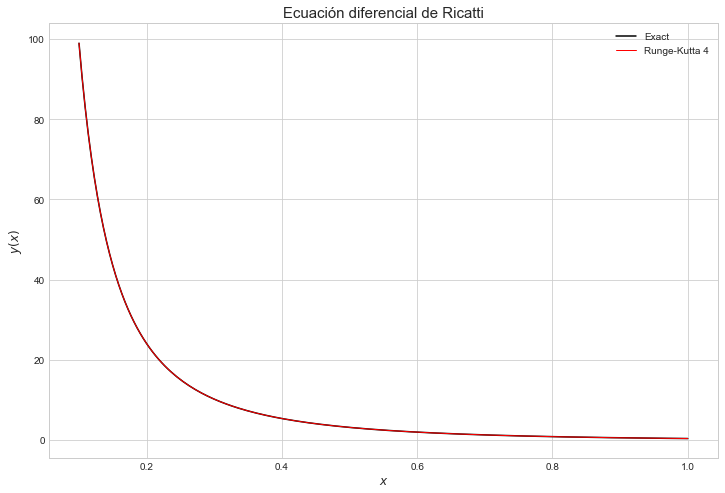

In [9]:
# Graficamos nuestra solución 

Tmin, Tmax, Npoints = 0.1,1., 200
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)
YExact = np.zeros(Npoints)
YExact= ExactSol(t)
Y = np.zeros(Npoints)
Y[0] = ExactSol(Tmin)
Y = GetRunge4(Y,t,deltat,Npoints)

plt.figure(figsize=(12,8))
plt.plot(t,YExact, c='k',label='Exact')
plt.plot(t,Y, linewidth = '1', c='r',label='Runge-Kutta 4')
plt.ylabel(r'$y(x)$', fontsize = 12)
plt.xlabel(r'$x$', fontsize = 12)
plt.title("Ecuación diferencial de Ricatti", fontsize = 15)
plt.legend( loc = 0)
plt.style.use('seaborn-whitegrid')
plt.show()

## 3. Soluciones oscilatorias
**1.** Considerese la siguiente ecuación diferencial:
$$
\frac{du}{dt} = \alpha u  \;,\quad u(0) = u_0
$$
Muestre que la solución numérica oscilará si $\Delta t > \frac{-1}{\alpha}$. En particular, ajuste $\alpha = -1$ y muestre las soluciones oscilatorias para $\Delta t = 1.1, 1.5, 1.9 \; s$.

In [10]:
# Primero definimos las funciones pertinentes e implementamos el método iterativo

def f(y, t, alpha):
    return alpha*y

def ExactSol(t, alpha):
    return np.exp(alpha*t)

def GetIterativeSol(u0,deltat, Npoints, alpha):
    U = np.zeros(Npoints)
    U[0] = u0
    for k in range(1,Npoints): 
        U[k] = U[0]*(1+alpha*deltat)**k 
        
    return U

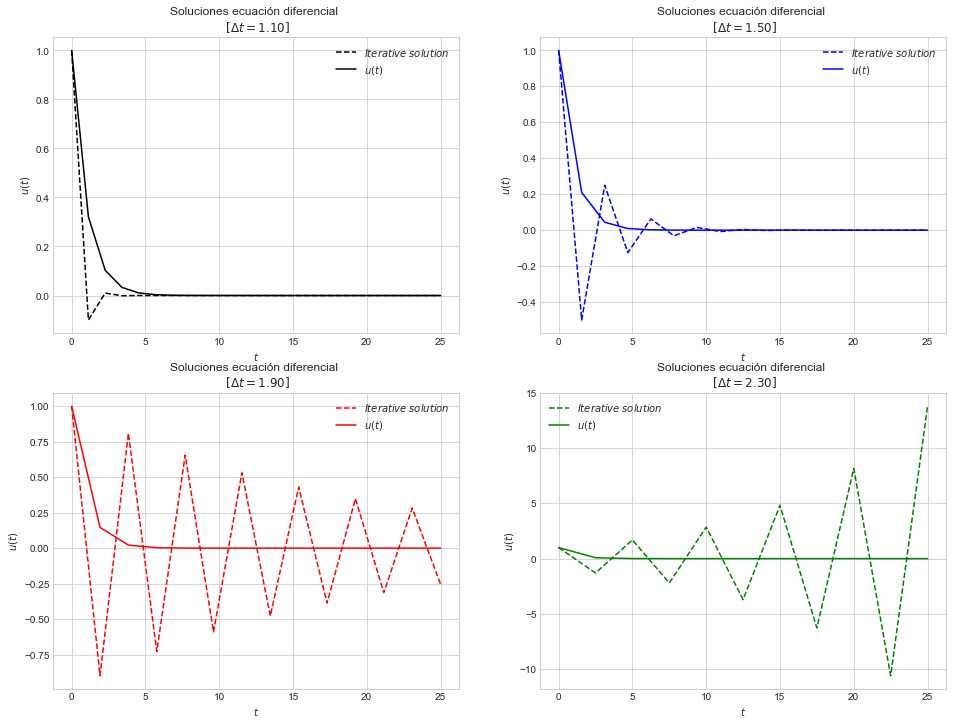

In [11]:
# Calculamos y graficamos nuestras soluciones
alpha = -1 
u0 = 1
T, UExact, U = [], [], []
for i in range(4):
    Tmin, Tmax= 0., 25.
    deltat = 1.1 + 0.4*i
    Npoints = int ((Tmax-Tmin)/deltat)   +1
    t = np.linspace(Tmin, Tmax, Npoints)
    UExact.append(ExactSol(t, alpha))
    U.append(GetIterativeSol(u0, deltat,Npoints, alpha))
    T.append(t)

fig = plt.figure(figsize =  (16, 12))
C = ['k','b','r','g']
for i in range(4):
    ax= fig.add_subplot(2,2,i+1)
    ax.plot(T[i], U[i], color=C[i], ls = '--',  label='$Iterative \; solution$')
    ax.plot(T[i], UExact[i], color= C[i],  label='$u(t)$')
    ax.set_ylabel(r'$u(t)$', fontsize = 10)
    ax.set_xlabel(r'$t$', fontsize = 10)
    ax.set_title('Soluciones ecuación diferencial \n $[\Delta t = {:.2f}]$'.format(1.1 + 0.4*i), fontsize = 12)
    ax.legend( loc = 'best')

plt.style.use('seaborn-whitegrid')
plt.show()

## 4. Análisis de estabilidad de sistemas dinámicos
**1.** a) Solucione numéricamente el sistema de ecuaciones.

In [12]:
# Definimos las funciones del sistema y los dos métodos que utilizaremos

Func = [lambda X,Y: 2*X -Y ,
         lambda X,Y: X +2*Y]

def GetEuler(Inicial, F, Npoints, h):
    X = np.zeros([Npoints])
    Y = np.zeros([Npoints])

    X[0] = Inicial[0]
    Y[0] = Inicial[1]
    

    for i in tqdm(range(1,Npoints)):
        X[i] = X[i-1] + F[0](X[i-1],Y[i-1])*deltat
        Y[i] = Y[i-1] + F[1](X[i-1],Y[i-1])*deltat
        
    return X, Y 

def GetRungeKutta4(Inicial, F, Npoints, h):
    
    X = np.zeros([Npoints])
    Y = np.zeros([Npoints])

    X[0] = Inicial[0]
    Y[0] = Inicial[1]
    
    K = np.zeros((2,4))
    for i in tqdm(range(1,Npoints)):
        
        for j in range(2):
            K[j][0] = h*F[j](X[i-1], Y[i-1])
        for j in range(2):
            K[j][1] = h*F[j](X[i-1] +0.5*K[0][0], Y[i-1] +0.5*K[1][0])
        for j in range(2):
            K[j][2] = h*F[j](X[i-1] +0.5*K[0][1], Y[i-1] +0.5*K[1][1])
        for j in range(2):
            K[j][3] = h*F[j](X[i-1] +0.5*K[0][2], Y[i-1] +K[1][2])
        
        X[i] = X[i-1] + (K[0][0]+2*K[0][1]+2*K[0][2]+K[0][3])/6.
        Y[i] = Y[i-1] + (K[1][0]+2*K[1][1]+2*K[1][2]+K[1][3])/6.

    return X,Y

100%|██████████| 200/200 [00:00<00:00, 25021.20it/s]


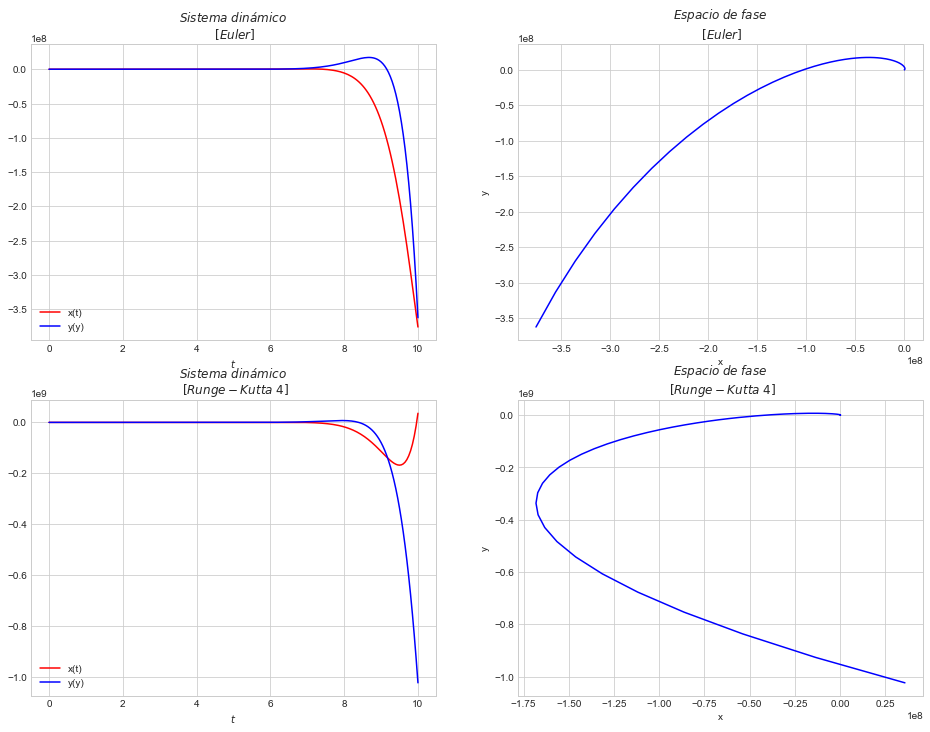

In [13]:
# Definimos la discretización para el tiempo

Tmin, Tmax, Npoints = 0.,10., 201
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)

# Puntos fijos particulares del sistema
X0, Y0 = 1, 2
Inicial = [X0, Y0]

# Ahora calculamos nuestras soluciones y graficamos
X, Y = GetEuler(Inicial, Func, Npoints, deltat)
Xr, Yr = GetRungeKutta4(Inicial, Func, Npoints, deltat)

fig = plt.figure(figsize =  (16, 12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(t, X, 'r', label='x(t)')
ax1.plot(t, Y, 'b', label='y(y)')
ax1.set_title("$Sistema \; dinámico$ \n $[Euler]$")
ax1.set_xlabel("$t$")
ax1.legend(loc='best')
ax2.plot(X, Y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("$Espacio \; de \; fase $ \n $[Euler]$")

ax3.plot(t, Xr, 'r', label='x(t)')
ax3.plot(t, Yr, 'b', label='y(y)')
ax3.set_title("$Sistema \; dinámico$ \n $[Runge-Kutta \; 4]$")
ax3.set_xlabel("$t$")
ax3.legend(loc='best')
ax4.plot(Xr, Yr, color="blue")
ax4.set_xlabel("x")
ax4.set_ylabel("y")  
ax4.set_title("$Espacio \; de \; fase $ \n $[Runge-Kutta \; 4]$")

plt.style.use('seaborn-whitegrid')
plt.show()

b) Sea el sistema autónomo lineal:
\begin{align*}
x' &= f(x,y) = 2x-y  \\
y' &=  g(x,y) = x+2y
\end{align*}
Partiendo de la definición de la matriz de estabilidad vemos directamente que:
\begin{align*}
M &= \begin{bmatrix}
\frac{\partial f(x_0 ,y_0) }{\partial x} & \frac{\partial f(x_0 ,y_0) }{\partial y}\\ 
\frac{\partial g(x_0 ,y_0) }{\partial x}  &  \frac{\partial g(x_0 ,y_0) }{\partial y}
\end{bmatrix} \\
M &= \begin{bmatrix}
2 & -1\\ 
1 & 2
\end{bmatrix}
\end{align*}

c) Encuentre numéricamente los valores y vectores propios.

In [14]:
# Encontramos los valores y vectores propios del sistema

M = [[2, -1], [1, 2]]
eigenValues, eigenVectors = np.linalg.eig(M)
for i in range(len(eigenValues)):
    display(Latex(r'$\lambda_{'+str(i+1)+ '} = '+ str(eigenValues[i])+' $'))
for i in range(len(eigenValues)):
    display(Latex(r'$v_{'+str(i+1)+ '} = ('+str(eigenVectors[0][i])+', \; \; \;' +str(eigenVectors[1][i])+')$ '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

d) Dibuje la trayectoria sobre el espacio fase. ¿Cuál es el punto crítico?

Los puntos críticos del sistema son encontrados al solucionar el sistema de ecuaciones:
    $$
    x' =0 \\
    y' = 0
    $$
Así, para nuesto caso particular vemos que el punto crítico correspone a $(x_c, y_c) = (0,0)$. Ahora graficamos los retratos de fase de las trayectoriás del sistema dinámico

<ipython-input-15-6ae6098b56e7>:26: RuntimeWarning: invalid value encountered in true_divide
  plt.quiver(X1, Y1, DX1/M, DY1/M , color = 'b' , pivot='mid', width = 0.003, headlength = 4)
No handles with labels found to put in legend.


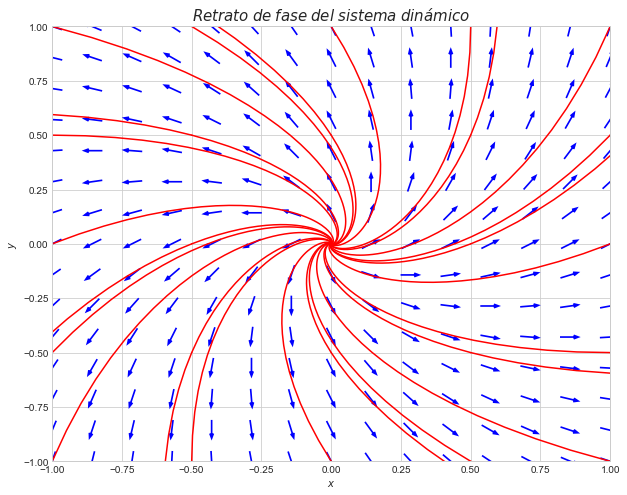

In [15]:
# Definimos el sistema asociado a nuestra ecuación diferencial

def dEdT(X, t):
    return [Func[0](X[0], X[1]), Func[1](X[0], X[1])]

# Generamos las trayectorias

t1 = np.linspace(Tmin, Tmax, Npoints)
t2 = np.linspace(-Tmin, -Tmax, Npoints)
xtest = np.linspace(-1, 1, 5)

fig = plt.figure(figsize =  (10, 8))
for r in xtest:
    for s in xtest:
        x0 = [r, s]
        x1 = scipy.integrate.odeint(dEdT, x0, t1)
        x2 = scipy.integrate.odeint(dEdT, x0, t2)
        plt.plot(x1[:,0], x1[:,1], "r-")
        plt.plot(x2[:,0], x2[:,1], "r-")
        
# Generamos el espacio vectorial y graficamos    

X1,Y1 = np.mgrid[-1:1:15j, -1:1:15j]
DX1, DY1 = Func[0](X1, Y1), Func[1](X1, Y1)
M = (np.hypot(DX1, DY1))  
plt.quiver(X1, Y1, DX1/M, DY1/M , color = 'b' , pivot='mid', width = 0.003, headlength = 4)

plt.xlabel('$x$', fontsize=10)
plt.ylabel('$y$', fontsize=10)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title("$Retrato \; de \; fase \; del \; sistema \; dinámico $", fontsize = 15)
plt.legend( loc = 0)
plt.style.use('seaborn-whitegrid')
plt.show()

Nótese que dado el comportamiento del espacio vectorial vemos que el punto crítico $(0,0)$ es un punto inestable. Más aún, esto se esperaba dado que los eigenvalores del sistema encontrados satisfacían $Re( \lambda)>0$.